In [1]:
from tensorflow.keras.models import load_model
import joblib

from PIL import Image
import numpy as np


In [2]:
# model = load_model('./models/model1.keras')
model = load_model('./models/model1.keras', compile=False) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lb = joblib.load('./models/label_binarizer1.pkl') 

In [3]:


file_path = './data/test/test_image.jpg'
og_image = Image.open(file_path)
image = og_image.convert('L') # convert to grayscale
image = image.resize((128, 128)) # resize
image = np.array(image) # convert to array
image = image / 255.0 # normalize

In [4]:
image.shape

(128, 128)

In [5]:
image_array = np.expand_dims(image, axis=0) 

In [6]:
image_array.shape

(1, 128, 128)

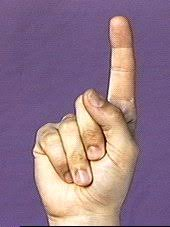

In [7]:
og_image

In [8]:
predictions = model.predict(image_array)

# If x_test is a batch of images
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
[[0.0000000e+00 1.0281569e-29 1.2775080e-30 0.0000000e+00 3.3087994e-25
  3.8407595e-20 3.3119891e-13 0.0000000e+00 1.1415962e-22 2.2890610e-35
  5.5303464e-16 7.7098297e-22 0.0000000e+00 5.2098198e-26 0.0000000e+00
  1.0355359e-24 1.8812009e-11 1.9528543e-31 0.0000000e+00 9.2236437e-02
  2.6751582e-08 0.0000000e+00 8.8266250e-30 3.5816140e-16 2.5820868e-36
  1.6410037e-30 3.3953604e-12 1.1420991e-11 1.0441993e-09 2.6746497e-22
  6.2678151e-35 9.0776360e-01 3.3206766e-38 0.0000000e+00 4.5430439e-12
  0.0000000e+00]]


In [19]:
predicted_class = np.argmax(predictions, axis=1)

predicted_class = np.expand_dims(predicted_class, axis=1)
predicted_class

array([[31]], dtype=int64)

In [20]:
original_label = lb.inverse_transform(predicted_class)

In [21]:
original_label

array(['0'], dtype='<U1')